# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [16]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale

import matplotlib.pyplot as plt
from matplotlib import cm

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

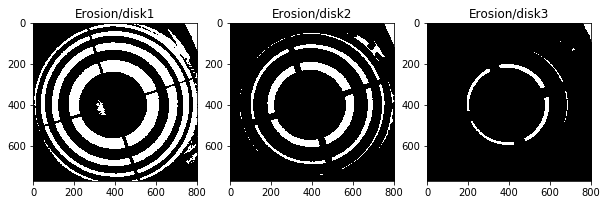

In [18]:
from skimage.morphology  import erosion
from skimage.morphology  import disk

file = './images/'
img_name = 'FindingContours.png'
contours_im = io.imread(file.__add__(img_name))
img_erosion1=erosion(contours_im, disk(1))
img_erosion2=erosion(contours_im, disk(10))
img_erosion3=erosion(contours_im, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes = axes.ravel()
axes[0].imshow(img_erosion1, cmap = cm.Greys_r)
axes[0].set_title('Erosion/disk1')
axes[1].imshow(img_erosion2, cmap = cm.Greys_r)
axes[1].set_title('Erosion/disk2')
axes[2].imshow(img_erosion3, cmap = cm.Greys_r)
axes[2].set_title('Erosion/disk3')

** Q.1.2 Dilation **

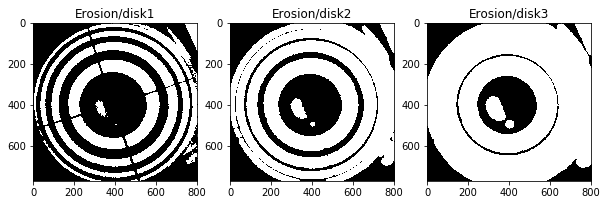

In [20]:
from skimage.morphology  import dilation

file = './images/'
img_name = 'FindingContours.png'
contours_im = io.imread(file.__add__(img_name))
img_dilation1=dilation(contours_im, disk(1))
img_dilation2=dilation(contours_im, disk(10))
img_dilation3=dilation(contours_im, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes = axes.ravel()
axes[0].imshow(img_dilation1, cmap = cm.Greys_r)
axes[0].set_title('Dilation/disk1')
axes[1].imshow(img_dilation2, cmap = cm.Greys_r)
axes[1].set_title('Dilation/disk2')
axes[2].imshow(img_dilation3, cmap = cm.Greys_r)
axes[2].set_title('Dilation/disk3')

** Q.1.3 Opening **

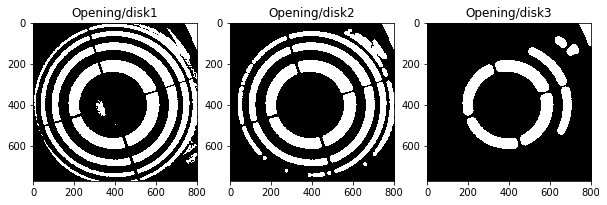

In [22]:
from skimage.morphology  import opening

file = './images/'
img_name = 'FindingContours.png'
contours_im = io.imread(file.__add__(img_name))
img_opening1=opening(contours_im, disk(1))
img_opening2=opening(contours_im, disk(10))
img_opening3=opening(contours_im, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes = axes.ravel()
axes[0].imshow(img_opening1, cmap = cm.Greys_r)
axes[0].set_title('Opening/disk1')
axes[1].imshow(img_opening2, cmap = cm.Greys_r)
axes[1].set_title('Opening/disk2')
axes[2].imshow(img_opening3, cmap = cm.Greys_r)
axes[2].set_title('Opening/disk3')

** Q.1.4 Closing**

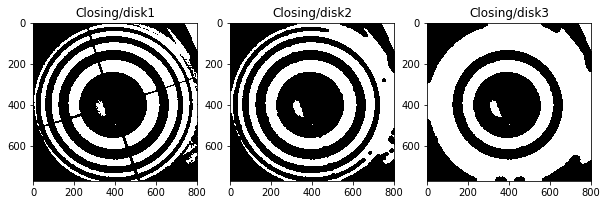

In [23]:
from skimage.morphology  import closing

file = './images/'
img_name = 'FindingContours.png'
contours_im = io.imread(file.__add__(img_name))
img_closing1=closing(contours_im, disk(1))
img_closing2=closing(contours_im, disk(10))
img_closing3=closing(contours_im, disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes = axes.ravel()
axes[0].imshow(img_closing1, cmap = cm.Greys_r)
axes[0].set_title('Closing/disk1')
axes[1].imshow(img_closing2, cmap = cm.Greys_r)
axes[1].set_title('Closing/disk2')
axes[2].imshow(img_closing3, cmap = cm.Greys_r)
axes[2].set_title('Closing/disk3')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\natal\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
C:\Users\natal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


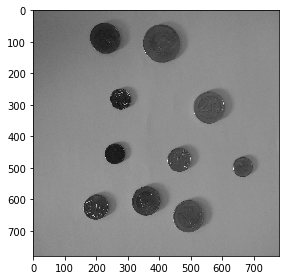

In [3]:
img_path = './images/'
img_coins = 'coins.jpg'
coins_im = io.imread(img_path.__add__(img_coins), as_grey=True)
from skimage import img_as_ubyte
coins_ubyte=img_as_ubyte(coins_im)
coins_rescaled = rescale(coins_ubyte, 1.0 / 4.0)
io.imshow(coins_rescaled)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

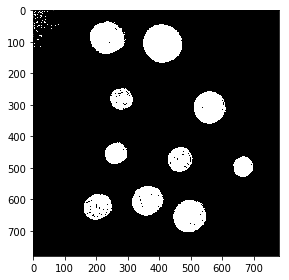

In [24]:
from skimage.filters  import threshold_otsu
from skimage.data import camera

thresh = threshold_otsu(coins_rescaled)
coins_binary = coins_rescaled <= thresh
io.imshow(coins_binary)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

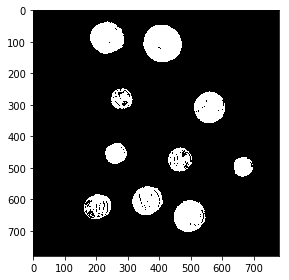

In [25]:
img_clean=erosion(coins_binary, disk(1))
io.imshow(img_clean)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Users\natal\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


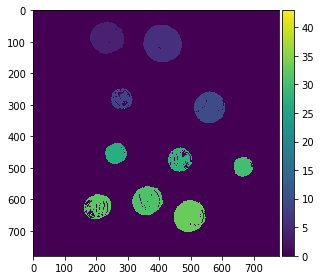

In [26]:
from skimage.measure  import label
from skimage.measure  import regionprops
 
coins_label, num_regions = label(img_clean, connectivity=None, return_num = True)
io.imshow(coins_label)
num_regions
coins_regionprops =regionprops(coins_label)
coins_regionprops

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

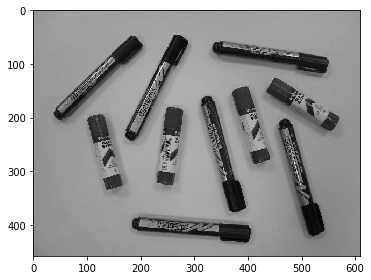

In [28]:
img_path = './images/'
img_objects = 'objets4.jpg'
objects_im = io.imread(img_path.__add__(img_objects), as_grey=True)
io.imshow(objects_im)

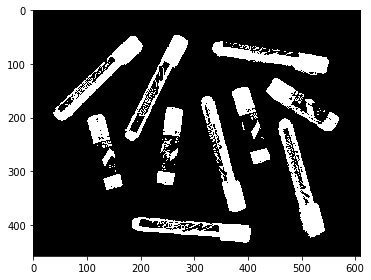

In [29]:
thresh = threshold_otsu(objects_im)
objects_binary = objects_im <= thresh
io.imshow(objects_binary)

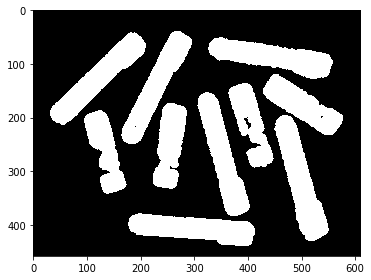

In [71]:
img_clean_objects=dilation(objects_binary, disk(7))
io.imshow(img_clean_objects)

C:\Users\natal\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


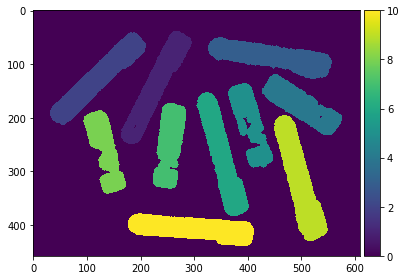

In [102]:
objects_label, num_regions = label(img_clean_objects, connectivity=None, return_num = True)
io.imshow(objects_label)

C:\Users\natal\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


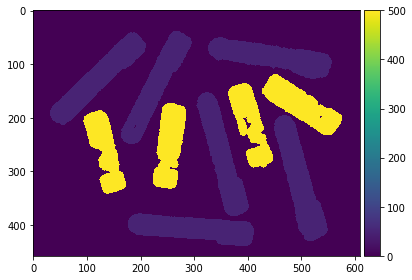

In [103]:
from skimage.draw import ellipse_perimeter

objects_regions =regionprops(objects_label)
detected_obj = 0;

for i ,region in enumerate(objects_regions):
    l_axis = region.major_axis_length/2;
    s_axis = region.minor_axis_length/2;
    c = region.coords
    
    if l_axis < 100:
        for x,y in c:
            objects_label[x, y] = 500;
    else:
        for x,y in c:
            objects_label[x, y] = 50;   
            
io.imshow(objects_label)